#  Data Analysis


In [ ]:
# importing libraries
import pandas as pd
import scipy
import numpy as np
from sklearn.preprocessing import MinMaxScaler


In [ ]:
# Load the dataset
df = pd.read_csv('/content/synthetic_sugar_data_balanced_Model2.csv')
print(df.head())


   sugar_type  age   bmi  steps_walked  calories_burned  activity_level  \
0           1   72  31.4         10707            303.1               0   
1          -2   49  15.0         14551            429.8               0   
2          -1   53  23.0          5116            119.5               0   
3           2   67  15.0          5514            275.1               1   
4           0   54  20.8          8378            406.0               1   

   fasting_glucose  sugar_intake  
0            107.4          13.6  
1             55.0          42.8  
2             68.6          31.8  
3            149.3          12.6  
4             99.3          30.9  


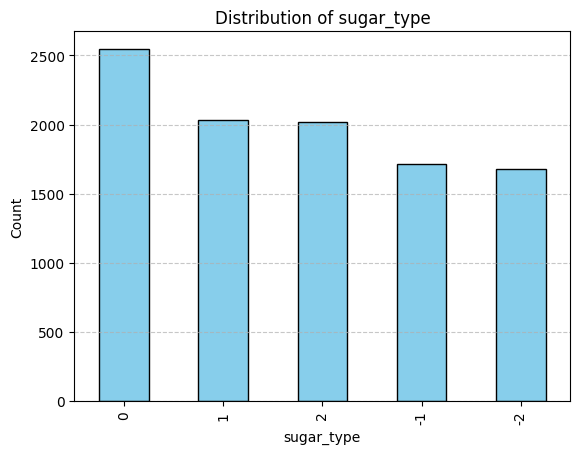

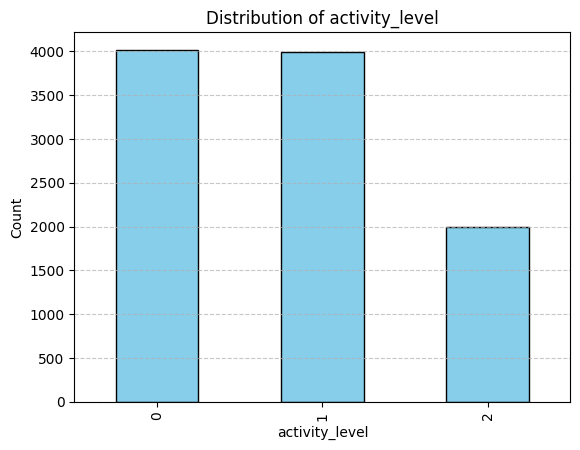

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
data =pd.read_csv('/content/synthetic_sugar_data_balanced_Model2.csv')
# Function to plot a bar graph for categorical features
def plot_categorical_feature(feature_name):
    counts = data[feature_name].value_counts()  # Count unique values
    counts.plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {feature_name}')
    plt.xlabel(feature_name)
    plt.ylabel('Count')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

# Plot bar graphs for each feature
categorical_features = ['sugar_type', 'activity_level']  # Add more if necessary
for feature in categorical_features:
    plot_categorical_feature(feature)


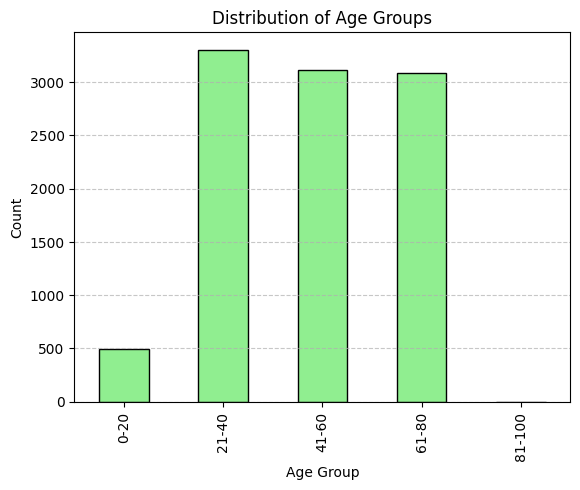

In [ ]:
# Categorizing 'age' into bins and plotting
data['age_group'] = pd.cut(data['age'], bins=[0, 20, 40, 60, 80, 100],
                           labels=['0-20', '21-40', '41-60', '61-80', '81-100'])
age_counts = data['age_group'].value_counts().sort_index()

age_counts.plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Distribution of Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Processing feature: sugar_type


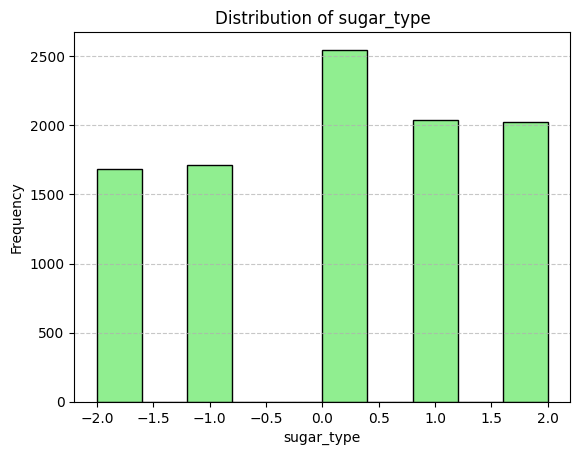

Processing feature: age


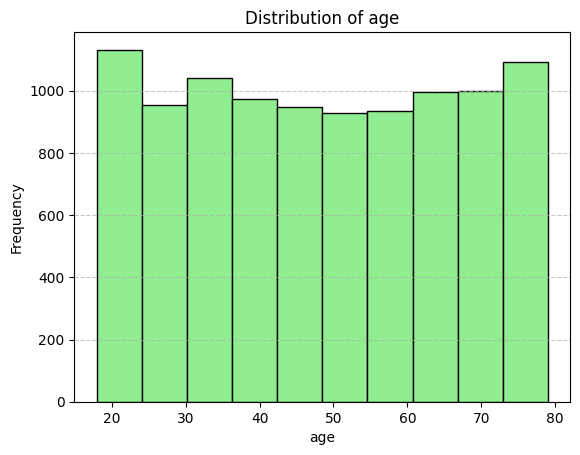

Processing feature: bmi


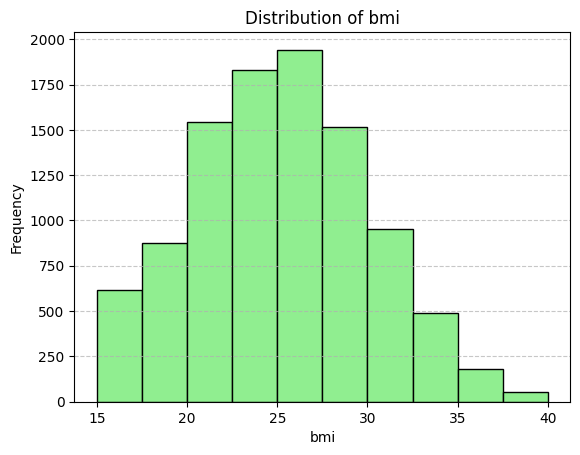

Processing feature: steps_walked


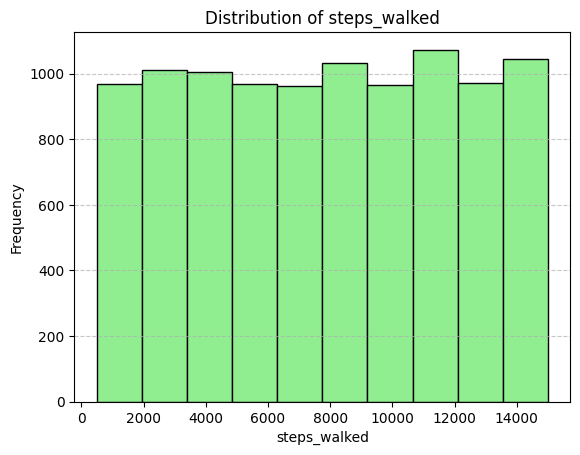

Processing feature: calories_burned


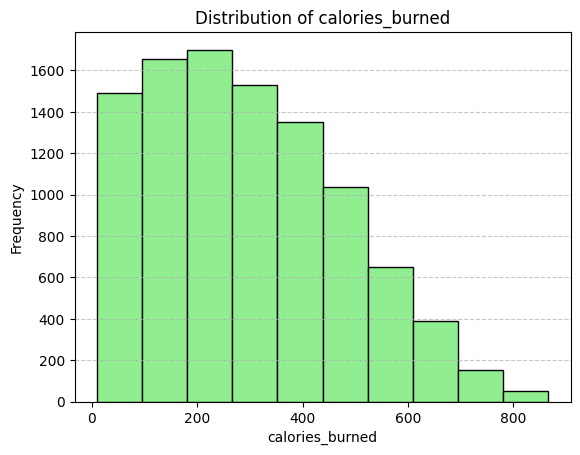

Processing feature: activity_level


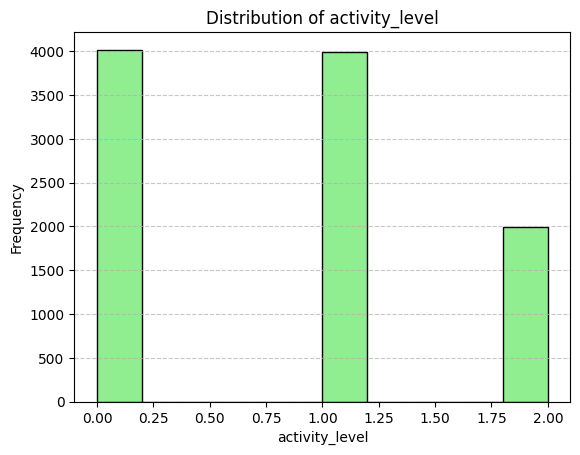

Processing feature: fasting_glucose


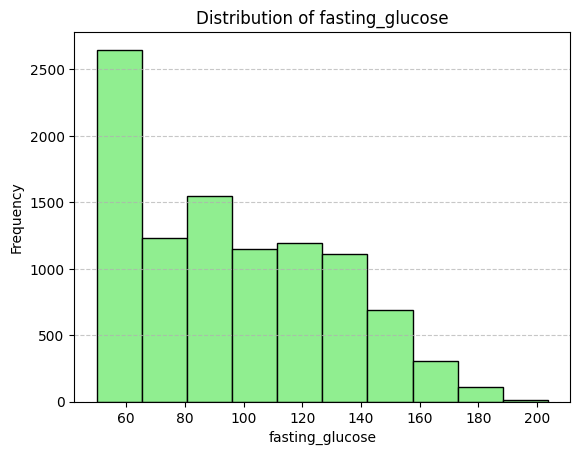

Processing feature: sugar_intake


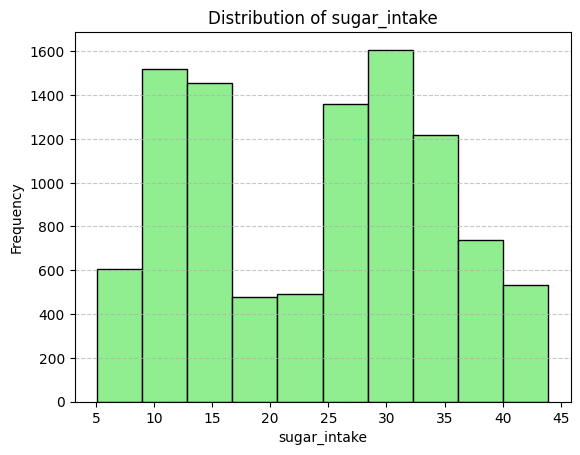

Processing feature: age_group
Feature 'age_group' is neither categorical nor numerical and will be skipped.


In [ ]:
def plot_categorical_feature(feature_name):
    counts = data[feature_name].value_counts()  # Count unique values
    counts.plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {feature_name}')
    plt.xlabel(feature_name)
    plt.ylabel('Count')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

def plot_numerical_feature(feature_name, bins=10):
    data[feature_name].plot(kind='hist', bins=bins, color='lightgreen', edgecolor='black')
    plt.title(f'Distribution of {feature_name}')
    plt.xlabel(feature_name)
    plt.ylabel('Frequency')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

for feature in data.columns:
    print(f"Processing feature: {feature}")
    if data[feature].dtype == 'object':  # Categorical feature
        plot_categorical_feature(feature)
    elif pd.api.types.is_numeric_dtype(data[feature]):  # Numeric feature
        plot_numerical_feature(feature)
    else:
        print(f"Feature '{feature}' is neither categorical nor numerical and will be skipped.")

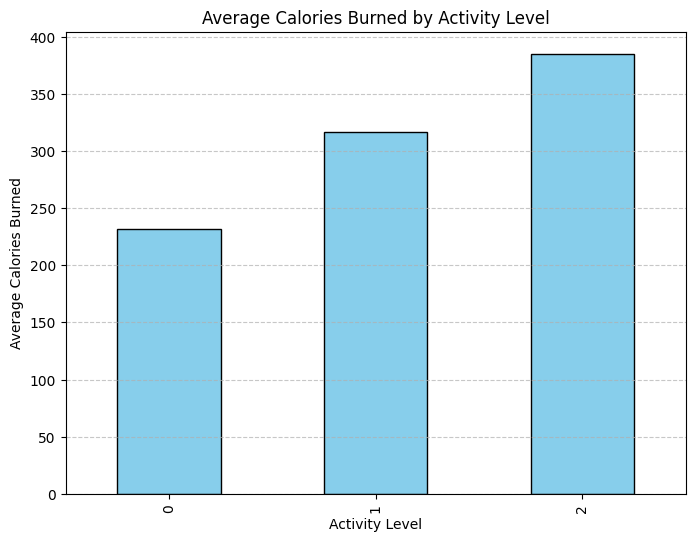

<ipython-input-48-c7d4c054278f>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='activity_level', y='calories_burned', data=data, palette='pastel')


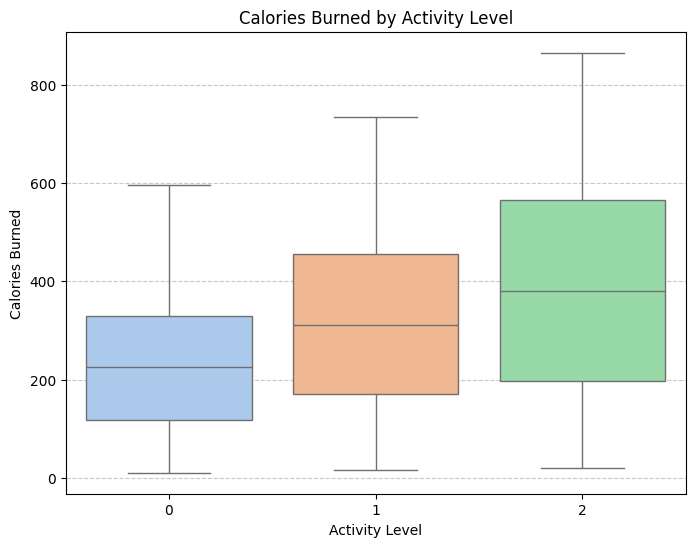

In [ ]:
import seaborn as sns
activity_calories = data.groupby('activity_level')['calories_burned'].mean()

# Plot the aggregated data
activity_calories.plot(kind='bar', color='skyblue', edgecolor='black', figsize=(8, 6))
plt.title('Average Calories Burned by Activity Level')
plt.xlabel('Activity Level')
plt.ylabel('Average Calories Burned')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(x='activity_level', y='calories_burned', data=data, palette='pastel')
plt.title('Calories Burned by Activity Level')
plt.xlabel('Activity Level')
plt.ylabel('Calories Burned')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sugar_type       10000 non-null  int64  
 1   age              10000 non-null  int64  
 2   bmi              10000 non-null  float64
 3   steps_walked     10000 non-null  int64  
 4   calories_burned  10000 non-null  float64
 5   activity_level   10000 non-null  int64  
 6   fasting_glucose  10000 non-null  float64
 7   sugar_intake     10000 non-null  float64
dtypes: float64(4), int64(4)
memory usage: 625.1 KB


In [ ]:
df.isnull().sum()

,0
sugar_type,0
age,0
bmi,0
steps_walked,0
calories_burned,0
activity_level,0
fasting_glucose,0
sugar_intake,0


In [ ]:
df.describe()

,sugar_type,age,bmi,steps_walked,calories_burned,activity_level,fasting_glucose,sugar_intake
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,0.099800,48.341400,25.130880,7800.666900,296.092410,0.79710,96.251210,23.958540
std,1.358832,17.913937,4.901269,4194.082089,180.225937,0.74819,33.821079,10.424289
min,-2.000000,18.000000,15.000000,500.000000,10.500000,0.00000,50.000000,5.100000
25%,-1.000000,33.000000,21.700000,4174.000000,147.900000,0.00000,64.500000,13.700000
50%,0.000000,48.000000,25.100000,7871.000000,275.500000,1.00000,92.300000,26.200000
75%,1.000000,64.000000,28.500000,11447.250000,424.025000,1.00000,123.900000,32.200000
max,2.000000,79.000000,40.000000,14997.000000,865.400000,2.00000,203.700000,43.900000


# Get the user Blood test Report and classify the type of **"diabetes patient"**


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import to_categorical

In [ ]:
# Load the dataset
df = pd.read_csv('/content/synthetic_patient_data_balanced.csv')

# Features and Target
X = df[['Age', 'Gender', 'Height', 'Weight', 'BMI', 'Fasting Glucose', 'HbA1c',
        'Insulin', 'BP_Systolic', 'BP_Diastolic', 'Cholesterol_Total',
        'Symptoms', 'Family_History']]
y = df['Type']

# Map target values (-2, -1, 0, 1, 2) to indices (0, 1, 2, 3, 4)
y_mapped = y + 2
y_encoded = to_categorical(y_mapped, num_classes=5)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Define the model
model = Sequential()
model.add(Input(shape=(X_train_scaled.shape[1],)))  # Input layer with the shape of your features
model.add(Dense(64, activation='relu'))  # Hidden layer with 64 neurons and ReLU activation
model.add(Dense(32, activation='relu'))  # Another hidden layer with 32 neurons and ReLU activation
model.add(Dense(5, activation='softmax'))  # Output layer with 5 neurons (for 5 classes) and softmax activation

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train_scaled, y_train, epochs=145, batch_size=32) #32 # Adjust epochs and batch_size as needed

Epoch 1/145
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2643 - loss: 1.5661
Epoch 2/145
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5402 - loss: 1.0532
Epoch 3/145
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7065 - loss: 0.7669
Epoch 4/145
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7804 - loss: 0.6054
Epoch 5/145
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7969 - loss: 0.5031
Epoch 6/145
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8380 - loss: 0.4230
Epoch 7/145
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8503 - loss: 0.3821
Epoch 8/145
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8808 - loss: 0.3349
Epoch 9/145
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8789 - loss: 0.3160
Epoch 10/145
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8860 - loss: 0.2949
Epoch 11/145
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8918 - loss: 0.2763
Epoch 12/145
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy:

In [ ]:
from sklearn.metrics import classification_report, accuracy_score

# Predict on the test set
y_pred_probs = model.predict(X_test_scaled)
y_pred = np.argmax(y_pred_probs, axis=1) - 2  # Reverse the mapping
y_test_actual = np.argmax(y_test, axis=1) - 2  # Reverse the mapping for true labels

# Classification report
print("Classification Report:")
print(classification_report(y_test_actual, y_pred))

# Accuracy
accuracy = accuracy_score(y_test_actual, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")


19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Classification Report:
              precision    recall  f1-score   support

          -2       0.83      0.84      0.83       141
          -1       0.77      0.78      0.77       113
           0       0.98      0.93      0.95       122
           1       0.88      0.95      0.91       111
           2       0.96      0.92      0.94       113

    accuracy                           0.88       600
   macro avg       0.88      0.88      0.88       600
weighted avg       0.88      0.88      0.88       600

Model Accuracy: 88.00%


In [ ]:
import numpy as np  # Ensure numpy is imported

def predict_target(age, gender, height, weight, bmi, fasting_glucose, hba1c, insulin, bp_systolic, bp_diastolic, cholesterol_total, symptoms, family_history):
    """
    Predict the target class for new input data.

    Parameters:
        age (float): Age of the individual.
        gender (int): Gender (e.g., 0 for female, 1 for male).
        height (float): Height in cm.
        weight (float): Weight in kg.
        bmi (float): Body Mass Index.
        fasting_glucose (float): Fasting glucose level.
        hba1c (float): HbA1c level.
        insulin (float): Insulin level.
        bp_systolic (float): Systolic blood pressure.
        bp_diastolic (float): Diastolic blood pressure.
        cholesterol_total (float): Total cholesterol level.
        symptoms (int): Symptoms indicator.
        family_history (int): Family history indicator.

    Returns:
        Predicted target class value.
    """
    # Ensure the scaler and model are defined and pre-trained
    if 'scaler' not in globals() or 'model' not in globals():
        raise ValueError("Scaler and model must be loaded before prediction.")

    # Combine input values into an array
    input_data = np.array([[age, gender, height, weight, bmi, fasting_glucose, hba1c, insulin,
                            bp_systolic, bp_diastolic, cholesterol_total, symptoms, family_history]])

    # Scale the input data
    input_data_scaled = scaler.transform(input_data)

    # Get predictions
    predictions = model.predict(input_data_scaled)

    # Reverse the mapping (ensure this is correct for your model)
    predicted_classes = np.argmax(predictions, axis=1) - 2
    return predicted_classes[0]


# Input To Predect type

In [ ]:
# Example usage
try:
    # Define input values
    age = 27
    gender = 1
    height = 170
    weight = 70
    bmi = 24.2
    fasting_glucose = 30
    hba1c = 5.4
    insulin = 15
    bp_systolic = 120
    bp_diastolic = 80
    cholesterol_total = 180
    symptoms = 2
    family_history = 1

    # Call the predict_target function with inputs
    predicted_patient_type = predict_target(
        age=age,
        gender=gender,
        height=height,
        weight=weight,
        bmi=bmi,
        fasting_glucose=fasting_glucose,
        hba1c=hba1c,
        insulin=insulin,
        bp_systolic=bp_systolic,
        bp_diastolic=bp_diastolic,
        cholesterol_total=cholesterol_total,
        symptoms=symptoms,
        family_history=family_history
    )
    print("Predicted Target Value:", predicted_patient_type)
except Exception as e:
    print("Error:", e)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted Target Value: -2


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


# **Model_To_Predict_The_Amount_Of_Sugar_Intake**

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.losses import Huber
import matplotlib.pyplot as plt


In [ ]:
# Load dataset (replace 'your_dataset.csv' with the actual dataset file)
data = pd.read_csv('/content/synthetic_sugar_data_balanced_Model2.csv')

# Display the first few rows


# Splitting features and target variable
X = data[['sugar_type', 'age', 'bmi', 'steps_walked', 'calories_burned', 'activity_level', 'fasting_glucose']]
y = data['sugar_intake']

# Scaling features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Converting to numpy arrays (if needed)
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)
print(X_test)


[[ 0.66251381 -1.07973849  0.19773826 ...  1.45273586 -1.06542504
  -0.30607325]
 [-0.80941201  1.65569875  0.66702792 ... -0.83561746  1.6078281
  -0.79987285]
 [ 1.39847672  0.92997051  0.34056555 ... -0.39115311  0.27120153
  -1.2463623 ]
 ...
 [ 0.66251381  0.31589276 -0.06751242 ...  0.20202093 -1.06542504
   1.03635199]
 [-0.0734491   0.76249476  1.52399165 ... -1.32669232 -1.06542504
  -0.51009823]
 [ 1.39847672  1.54404825 -1.4957853  ...  0.61485673  1.6078281
   1.96185662]]


In [ ]:
# Define the improved neural network
model = Sequential()

# Input layer and first hidden layer
model.add(Dense(256, activation='relu', input_dim=X_train.shape[1]))
model.add(BatchNormalization())  # Add Batch Normalization
model.add(Dropout(0.3))  # Add Dropout

# Second hidden layer
model.add(Dense(125, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

# Third hidden layer
model.add(Dense(75, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

# fourth hidden layer
model.add(Dense(34, activation='relu'))

# Output layer
model.add(Dense(1, activation='linear'))  # Linear activation for regression

# Compile the model using Huber loss and Adam optimizer
model.compile(optimizer=Adam(learning_rate=0.001), loss=Huber(delta=1.0), metrics=['mae'])

# Display the model architecture
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_67 (Dense)                     │ (None, 256)                 │           2,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_38 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_68 (Dense)                     │ (None, 125)                 │          32,125 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 125)                 │             500 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_39 (Dropout)                 │ (None, 125)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_69 (Dense)                     │ (None, 75)                  │           9,450 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 75)                  │             300 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_40 (Dropout)                 │ (None, 75)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_70 (Dense)                     │ (None, 34)                  │           2,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_71 (Dense)                     │ (None, 1)                   │              35 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 48,066 (187.76 KB)

 Trainable params: 47,154 (184.20 KB)

 Non-trainable params: 912 (3.56 KB)

In [ ]:
# Define Early Stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

# Train the model
history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    epochs=155,  # Increased epochs
    batch_size=32,
    callbacks=[early_stopping],
    verbose=1
)


Epoch 1/155
200/200 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 16.1659 - mae: 16.6594 - val_loss: 4.7310 - val_mae: 5.2140
Epoch 2/155
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3.5080 - mae: 3.9813 - val_loss: 2.2062 - val_mae: 2.6737
Epoch 3/155
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3.2096 - mae: 3.6785 - val_loss: 2.1743 - val_mae: 2.6399
Epoch 4/155
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3.0657 - mae: 3.5377 - val_loss: 2.0989 - val_mae: 2.5633
Epoch 5/155
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.9608 - mae: 3.4315 - val_loss: 2.1027 - val_mae: 2.5667
Epoch 6/155
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.9614 - mae: 3.4308 - val_loss: 2.2105 - val_mae: 2.6766
Epoch 7/155
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 3.0305 - mae: 3.5027 - val_loss: 2.0533 - val_mae: 2.5185
Epoch 8/155
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 2.9415 - mae: 3.4127 - val_loss: 2.1398 - val_mae: 2.6113
Epoch 9/155
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3m

In [ ]:
# Evaluate the model on the test data
loss, mae = model.evaluate(X_test, y_test)
print(f"Test Loss (Huber): {loss:.2f}")
print(f"Test Mean Absolute Error (MAE): {mae:.2f}")

# Predict on test data
y_pred = model.predict(X_test)

# Calculate R² Score
r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2:.2f}")



63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.0413 - mae: 2.5096
Test Loss (Huber): 2.03
Test Mean Absolute Error (MAE): 2.50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
R² Score: 0.92


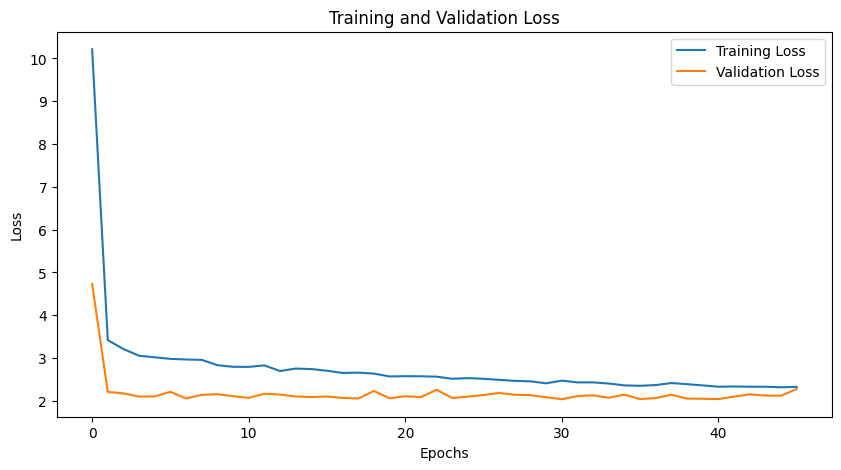

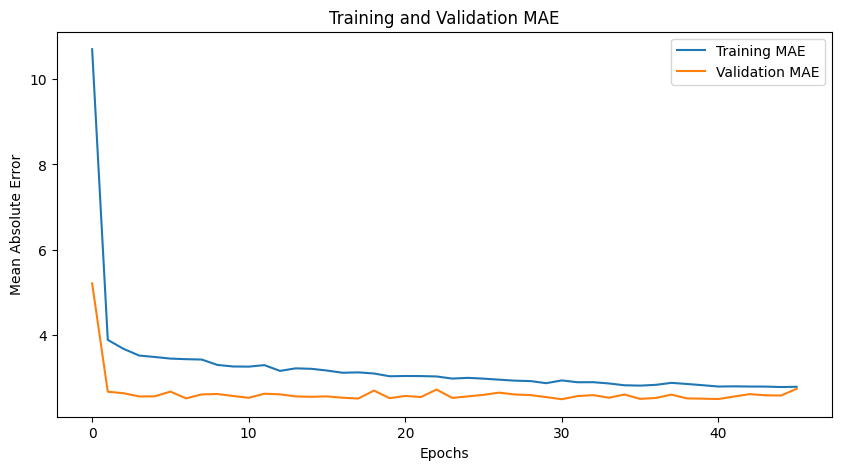

In [ ]:
# Plot training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Plot training and validation MAE
plt.figure(figsize=(10, 5))
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.title('Training and Validation MAE')
plt.legend()
plt.show()


In [ ]:
# Hyperparameter tuning using a grid search approach
from itertools import product

# Define parameter grid
learning_rates = [0.001, 0.0005]
batch_sizes = [32, 128] #64
dropout_rates = [0.2, 0.3]

# Track best parameters and score
best_mae = float('inf')
best_params = {}

# Try all combinations of parameters
for lr, batch_size, dropout in product(learning_rates, batch_sizes, dropout_rates):
    print(f"Testing with LR: {lr}, Batch Size: {batch_size}, Dropout: {dropout}")
    model = Sequential([
        Dense(128, activation='relu', input_dim=X_train.shape[1]),
        Dropout(dropout),
        Dense(64, activation='relu'),
        Dropout(dropout),
        Dense(1, activation='linear')
    ])
    model.compile(optimizer=Adam(learning_rate=lr), loss=Huber(delta=1.0), metrics=['mae'])
    model.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=batch_size, verbose=0)
    loss, mae = model.evaluate(X_test, y_test, verbose=0)
    if mae < best_mae:
        best_mae = mae
        best_params = {'learning_rate': lr, 'batch_size': batch_size, 'dropout': dropout}

print("Best Parameters:", best_params)
print(f"Best MAE: {best_mae:.2f}")


Testing with LR: 0.001, Batch Size: 32, Dropout: 0.2


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Testing with LR: 0.001, Batch Size: 32, Dropout: 0.3
Testing with LR: 0.001, Batch Size: 128, Dropout: 0.2
Testing with LR: 0.001, Batch Size: 128, Dropout: 0.3
Testing with LR: 0.0005, Batch Size: 32, Dropout: 0.2
Testing with LR: 0.0005, Batch Size: 32, Dropout: 0.3
Testing with LR: 0.0005, Batch Size: 128, Dropout: 0.2
Testing with LR: 0.0005, Batch Size: 128, Dropout: 0.3
Best Parameters: {'learning_rate': 0.0005, 'batch_size': 32, 'dropout': 0.2}
Best MAE: 2.55


In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate R² score
r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2:.2f}")

# Calculate Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.2f}")


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
R² Score: 0.90
Mean Absolute Error (MAE): 2.75


In [ ]:
def predict_sugar_intake(sugar_type, age, bmi, steps_walked, calories_burned, activity_level, fasting_glucose):
    """
    Predict sugar intake based on input features.

    Parameters:
        sugar_type (float): Type of sugar (encoded as numeric values).
        age (float): Age of the individual.
        bmi (float): Body Mass Index.
        steps_walked (float): Number of steps walked.
        calories_burned (float): Calories burned.
        activity_level (float): Activity level (e.g., low, moderate, high encoded as numeric values).
        fasting_glucose (float): Fasting glucose level.

    Returns:
        float: Predicted sugar intake value.
    """
    # Combine input values into an array
    input_data = np.array([[sugar_type, age, bmi, steps_walked, calories_burned, activity_level, fasting_glucose]])
    input_data_scaled = scaler.transform(input_data)  # Scale the input data
    predicted_value = model.predict(input_data_scaled)  # Get the predicted sugar intake
    return predicted_value[0][0]  # Extract the single predicted value




# Input for predect the amount of sugar

In [ ]:
# Example usage
predicted_sugar_intake = predict_sugar_intake(
    sugar_type=predicted_patient_type,
    age=30,
    bmi=22.5,
    steps_walked=8000,
    calories_burned=300,
    activity_level=2.0,
    fasting_glucose=120.0
)

print("Predicted Sugar Intake:", predicted_sugar_intake)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted Sugar Intake: 35.44852


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


# **Find_The_Amount_Sugar_In_Food**


In [ ]:
# Install the required libraries
!pip install opencv-python pyzbar requests
!apt-get install -y libzbar0
!pip install pyzbar opencv-python requests

import cv2
from pyzbar.pyzbar import decode
import requests
from google.colab import files
import requests
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
libzbar0 is already the newest version (0.23.92-4build2).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [ ]:
# Upload the image with the barcode
uploaded = files.upload()
image_path = list(uploaded.keys())[0]

Saving burbon.jpg to burbon.jpg


In [ ]:
import requests
import cv2
from pyzbar.pyzbar import decode
from google.colab import files

def get_nutrition_info(barcode):
    """
    Query the OpenFoodFacts API with the scanned barcode to get detailed nutritional information.
    """
    url = f"https://world.openfoodfacts.org/api/v0/product/{barcode}.json"
    try:
        response = requests.get(url, timeout=50)
        if response.status_code == 200:
            data = response.json()
            if data.get("status") == 1:  # Product found in the database
                product = data.get("product", {})
                product_name = product.get("product_name", "Unknown Product")
                nutriments = product.get("nutriments", {})
                serving_size = product.get("serving_size", "100g")
                serving_quantity = product.get("quantity", None)

                # Extract numeric value from serving_size (e.g., "100g" -> 100)
                try:
                    serving_size_grams = float(''.join(filter(str.isdigit, serving_size)))
                except ValueError:
                    serving_size_grams = 100  # Default to 100g if serving_size is not in grams

                # Calculate total packet weight in grams
                total_packet_weight_g = None
                if serving_quantity:
                    try:
                        total_packet_weight_g = float(''.join(filter(str.isdigit, serving_quantity)))
                    except ValueError:
                        total_packet_weight_g = None

                sugars_100g = nutriments.get("sugars_100g", "N/A")

                # Calculate total sugars in pack
                total_sugars_in_pack = None
                if total_packet_weight_g and sugars_100g != "N/A":
                    try:
                        total_sugars_in_pack = (float(sugars_100g) * total_packet_weight_g) / 100
                    except ValueError:
                        total_sugars_in_pack = "N/A"

                return {
                    "product_name": product_name,
                    "serving_size": serving_size,
                    "total_packet_weight_g": total_packet_weight_g,
                    "sugars_100g": sugars_100g,
                    "total_sugars_in_pack": total_sugars_in_pack,
                }
            else:
                return {"error": "Product not found in the database"}
        else:
            return {"error": f"API returned status code {response.status_code}"}
    except requests.exceptions.RequestException as e:
        return {"error": f"API request failed: {str(e)}"}

def scan_barcode_from_image(image_path):
    """
    Scan a barcode from the uploaded image.
    """
    try:
        image = cv2.imread(image_path)
        barcodes = decode(image)

        if barcodes:
            for barcode in barcodes:
                barcode_data = barcode.data.decode("utf-8").strip()
                print(f"Barcode detected: {barcode_data}")

                nutrition_info = get_nutrition_info(barcode_data)
                if "error" in nutrition_info:
                    return {"error": nutrition_info["error"]}

                return nutrition_info
        else:
            return {"error": "No barcode detected."}
    except Exception as e:
        return {"error": f"Error processing image: {str(e)}"}

def determine_product_type(product_name):
    """
    Determine the product type based on keywords in the product name.
    """
    product_name = product_name.lower()
    if "chocolate" in product_name:
        return "Chocolate"
    elif "biscuit" in product_name or "cookie" in product_name:
        return "Biscuit"
    elif "drink" in product_name or "juice" in product_name:
        return "Drink"
    elif "snack" in product_name:
        return "Snack"
    else:
        return "Other"


# Scan the barcode and display the information
result = scan_barcode_from_image(image_path)
if result:
    if "error" in result:
        print(f"\nError: {result['error']}")
    else:
        product_name = result.get("product_name", "Unknown Product")
        serving_size = result.get("serving_size", "100g")
        total_packet_weight_g = result.get("total_packet_weight_g", "N/A")
        product_type = determine_product_type(product_name)
        sugars_100g = result.get("sugars_100g", "N/A")
        total_sugars_in_pack = result.get("total_sugars_in_pack", "N/A")

        print("\nScanned Product Information:")
        print(f"  Product Name          : {product_name}")
        print(f"  Serving Size            : {serving_size}")
        print(f"  Total Packet Weight   : {total_packet_weight_g} g")
        print(f"  Product Type          : {product_type}")
        print(f"  Sugars per 100g       : {sugars_100g} g")
        print(f"  Total Sugars in Pack   : {total_sugars_in_pack} g")
else:
    print("\nNo information found.")

Barcode detected: 8901063139329

Scanned Product Information:
  Product Name          : bourbon
  Serving Size            : 100g
  Total Packet Weight   : 50.0 g
  Product Type          : Other
  Sugars per 100g       : N/A g
  Total Sugars in Pack   : None g


In [ ]:
# Example values for testing

sugar_to_intake = predicted_sugar_intake # The maximum amount of sugar the patient can take
product_name = result.get('product_name', 'N/A')
sugar = result.get('total_sugars_in_pack', 'N/A')
added_sugar = result.get('added_sugar_per_pack', 'N/A') # or another relevant key from the result

# Check if either sugar or added_sugar is 'N/A' or None
if (sugar == 'N/A' or sugar is None) and (added_sugar == 'N/A' or added_sugar is None):
    print("\nNo sugar detected or no information found.")
elif (sugar != 'N/A' and sugar is not None) and (added_sugar != 'N/A' and added_sugar is not None):
    # If both are available and not None, calculate the total sugar amount
    try:
        amount_of_sugar = float(sugar) + float(added_sugar)
    except ValueError:
        print("\nError: The sugar values are not valid numbers.")
        amount_of_sugar = 0  # Handle invalid values gracefully
elif added_sugar == 'N/A' or added_sugar is None:
    # If only sugar is available and not None
    try:
        amount_of_sugar = float(sugar)
    except (ValueError, TypeError): # Catch TypeError if sugar is None
        print("\nError: The sugar value is not a valid number or is None.")
        amount_of_sugar = 0  # Handle invalid value gracefully
else:
    # If only added_sugar is available and not None
    try:
        amount_of_sugar = float(added_sugar)
    except (ValueError, TypeError): # Catch TypeError if added_sugar is None
        print("\nError: The added sugar value is not a valid number or is None.")
        amount_of_sugar = 0  # Handle invalid value gracefully

# Print the calculated sugar amount for verification
print(f"\nAmount of sugar in {product_name}: {result.get('total_sugars_in_pack', 'N/A')}g")


Amount of sugar in Oreo: 1697.5g


In [ ]:
import random

# Function to check if the patient can consume the product based on the sugar intake
def check_sugar_intake(sugar_to_intake, amount_of_sugar, product_name):
    # Define an expanded set of response options for each category
    response_options = {
        "under_limit": [
            f"You can safely enjoy {product_name}. With only {amount_of_sugar}g of sugar, you still have {sugar_to_intake - amount_of_sugar}g left for the day.",
            f"{product_name} fits perfectly within your sugar limit! It contains {amount_of_sugar}g of sugar, leaving you {sugar_to_intake - amount_of_sugar}g for the rest of the day.",
            f"Good news! You can enjoy {product_name} now. With {amount_of_sugar}g of sugar, you have {sugar_to_intake - amount_of_sugar}g left to balance your intake.",
            f"{product_name} is a good choice. You can still consume {sugar_to_intake - amount_of_sugar}g of sugar later today.",
            f"Feel free to have {product_name}! Its {amount_of_sugar}g of sugar leaves you enough room to take {sugar_to_intake - amount_of_sugar}g later in the day.",
            f"Enjoy {product_name} without worry! With {amount_of_sugar}g of sugar, you can still consume {sugar_to_intake - amount_of_sugar}g before bedtime.",
            f"{product_name} has just {amount_of_sugar}g of sugar. You can enjoy it and still stay under your limit for the day.",
            f"With {product_name} containing {amount_of_sugar}g of sugar, you're safe to enjoy it and leave {sugar_to_intake - amount_of_sugar}g for later meals.",
            f"{product_name} is within your safe range for today. You can still consume {sugar_to_intake - amount_of_sugar}g of sugar before the day's end.",
            f"{product_name} is safe to eat now! With {amount_of_sugar}g of sugar, you can relax and enjoy {sugar_to_intake - amount_of_sugar}g more later.",
            f"Go ahead with {product_name}. You’ll still have {sugar_to_intake - amount_of_sugar}g of sugar left to consume throughout the day.",
            f"Good choice with {product_name}. Its {amount_of_sugar}g of sugar means you can take {sugar_to_intake - amount_of_sugar}g more safely.",
            f"You're making a great choice! {product_name} has {amount_of_sugar}g of sugar, leaving room for {sugar_to_intake - amount_of_sugar}g later.",
            f"With {product_name}, you have enough room to enjoy an extra treat today. {amount_of_sugar}g of sugar keeps you under your limit.",
            f"Enjoy {product_name} now and relax! You still have {sugar_to_intake - amount_of_sugar}g of sugar allowance left today.",
            f"{product_name} is just right for your current intake. You have {sugar_to_intake - amount_of_sugar}g left for the day after this.",
        ],
        "close_to_limit": [
            f"You're cutting it close with {product_name}. It contains {amount_of_sugar}g of sugar, leaving just {sugar_to_intake - amount_of_sugar}g for the rest of the day.",
            f"With {product_name}, you're only {sugar_to_intake - amount_of_sugar}g away from your limit. You might want to save the rest for later.",
            f"{product_name} is pushing your limit. It has {amount_of_sugar}g of sugar, leaving little room for other snacks today.",
            f"You're close to the edge with {product_name}. At {amount_of_sugar}g, you only have {sugar_to_intake - amount_of_sugar}g left for the day.",
            f"{product_name} leaves you just under the limit. With {amount_of_sugar}g of sugar, you can only have {sugar_to_intake - amount_of_sugar}g more today.",
            f"Careful with {product_name}. Its {amount_of_sugar}g of sugar leaves you just {sugar_to_intake - amount_of_sugar}g shy of your limit.",
            f"{product_name} contains {amount_of_sugar}g of sugar, leaving just {sugar_to_intake - amount_of_sugar}g for the day. Plan accordingly!",
            f"You're close to your limit! {product_name} with {amount_of_sugar}g of sugar leaves very little allowance for later.",
            f"Choose wisely after {product_name}. With {amount_of_sugar}g of sugar, you only have {sugar_to_intake - amount_of_sugar}g left for the day.",
            f"{product_name} has {amount_of_sugar}g of sugar. You're just shy of your daily limit. Be cautious with your next choices.",
        ],
        "over_limit": [
            f"{product_name} contains {amount_of_sugar}g of sugar, which is over your daily limit. It’s better to avoid it.",
            f"Skip {product_name}. With {amount_of_sugar}g of sugar, it exceeds your limit by {amount_of_sugar - sugar_to_intake}g.",
            f"Unfortunately, {product_name} is not suitable for today. Its {amount_of_sugar}g of sugar is too high.",
            f"{product_name} has {amount_of_sugar}g of sugar, exceeding your limit by {amount_of_sugar - sugar_to_intake}g. Opt for something lighter.",
            f"Be cautious! {product_name} with {amount_of_sugar}g of sugar is over your limit. Consider a healthier alternative.",
            f"With {amount_of_sugar}g of sugar, {product_name} exceeds your recommended limit of {sugar_to_intake}g. It’s best to avoid it.",
            f"{product_name} is not a safe choice right now. It contains {amount_of_sugar}g of sugar, which is above your limit.",
            f"Consider skipping {product_name}. Its sugar content of {amount_of_sugar}g goes over your limit by {amount_of_sugar - sugar_to_intake}g.",
            f"Stay healthy! {product_name} contains {amount_of_sugar}g of sugar, surpassing your limit. Choose a better option.",
            f"{product_name} is over the top! With {amount_of_sugar}g of sugar, it’s not safe for your intake goals.",
        ]
    }

    # Determine which category the product falls into
    if amount_of_sugar < sugar_to_intake:
        response = random.choice(response_options["under_limit"])
    elif abs(amount_of_sugar - sugar_to_intake) <= 5:  # Threshold for "close to limit"
        response = random.choice(response_options["close_to_limit"])
    else:
        response = random.choice(response_options["over_limit"])

    # Output the dynamically generated response
    print(response)

# Example usage
check_sugar_intake(sugar_to_intake, amount_of_sugar, product_name)
sugar_to_intake = predicted_sugar_intake -amount_of_sugar


Stay healthy! Oreo contains 1697.5g of sugar, surpassing your limit. Choose a better option.


In [ ]:
import random

# Base template structure for sentence generation
def generate_sentences(product_name, amount_of_sugar, sugar_to_intake):
    category = ""
    remaining_sugar = sugar_to_intake - amount_of_sugar
    excess_sugar = amount_of_sugar - sugar_to_intake

    # Determine category based on sugar values
    if amount_of_sugar < sugar_to_intake:
        category = "under_limit"
    elif amount_of_sugar == sugar_to_intake:
        category = "close_to_limit"
    else:
        category = "over_limit"

    base_phrases = {
        "under_limit": [
            "You can safely enjoy {product_name}. With only {amount_of_sugar}g of sugar, you still have {remaining_sugar}g left for the day.",
            "{product_name} fits perfectly within your sugar limit! It contains {amount_of_sugar}g of sugar, leaving you {remaining_sugar}g for the rest of the day.",
            "Good news! You can enjoy {product_name} now. With {amount_of_sugar}g of sugar, you have {remaining_sugar}g left to balance your intake.",
            "{product_name} is a good choice. You can still consume {remaining_sugar}g of sugar later today.",
        ],
        "close_to_limit": [
            "You're cutting it close with {product_name}. It contains {amount_of_sugar}g of sugar, leaving just {remaining_sugar}g for the rest of the day.",
            "With {product_name}, you're only {remaining_sugar}g away from your limit. You might want to save the rest for later.",
            "{product_name} is pushing your limit. It has {amount_of_sugar}g of sugar, leaving little room for other snacks today.",
        ],
        "over_limit": [
            "{product_name} contains {amount_of_sugar}g of sugar, which is over your daily limit. It’s better to avoid it.",
            "Skip {product_name}. With {amount_of_sugar}g of sugar, it exceeds your limit by {excess_sugar}g.",
            "Unfortunately, {product_name} is not suitable for today. Its {amount_of_sugar}g of sugar is too high.",
        ],
    }

    # Synonyms for variation
    synonyms = {
        "safely": ["comfortably", "without worry", "happily"],
        "enjoy": ["have", "consume", "savor"],
        "limit": ["threshold", "recommended intake", "allowance"],
        "perfectly": ["ideally", "wonderfully", "suitably"],
        "good choice": ["wise option", "great selection", "sensible decision"],
        "avoid": ["skip", "steer clear of", "pass on"],
    }

    # Expand phrases with synonyms and generate variations
    generated_sentences = []
    for template in base_phrases[category]:
        # Generate variations by replacing words with synonyms
        sentence_variations = [template]
        for key, values in synonyms.items():
            if key in template:
                sentence_variations = [
                    variation.replace(key, synonym)
                    for variation in sentence_variations
                    for synonym in values
                ]

        for variation in sentence_variations:
            sentence = variation.format(
                product_name=product_name,
                amount_of_sugar=amount_of_sugar,
                remaining_sugar=remaining_sugar,
                excess_sugar=excess_sugar,
            )
            generated_sentences.append(sentence)

    random.shuffle(generated_sentences)  # Shuffle sentences for randomness
    return generated_sentences

# Example usage
product_name = "Chocolate Bar"
amount_of_sugar = 78
sugar_to_intake = 50

# Generate sentences based on the determined category
sentences = generate_sentences(product_name, amount_of_sugar, sugar_to_intake)

# Print a sample of the generated sentences
print("\n".join(sentences[:1]))  # Display the first 10 for brevity

sugar_to_intake = predicted_sugar_intake -amount_of_sugar


Chocolate Bar contains 78g of sugar, which is over your daily threshold. It’s better to steer clear of it.
